In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import itertools

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.benchmarks import *

from sklearn.decomposition import SparsePCA

In [2]:
solver_ospca = ObliqueSPCA(logverbosity = 2, maxiter = 2000)
Benchmark1 = GaussianSPCA(verb=1)

In [135]:
params = {
    'rank': [10],
    'n': [500],
    'num_samples': [500, 1000, 1500],
    'theta': [5],
    'alpha': np.linspace(start=0.1,stop = 0.25,num=11),
    'run': np.arange(0,20)
}

In [134]:
opt_log, final_values, _ = Benchmark1.single_test(solver_ospca.solve, point)

Problem solved in 760 iterations.


In [8]:
test_results = Benchmark1.grid_test(solver_ospca.solve, params)

Problem solved in 118 iterations.


/Users/vary/src/pynopt/nopt/constraints/sparse_oblique.py:56: RuntimeWarning: invalid value encountered in true_divide
  return (ind, _x / col_norms)


Problem solved in 179 iterations.
Problem solved in 331 iterations.
Problem solved in 138 iterations.
Problem solved in 152 iterations.
Problem solved in 2000 iterations.
Problem solved in 82 iterations.
Problem solved in 348 iterations.
Problem solved in 1354 iterations.
Problem solved in 106 iterations.
Problem solved in 184 iterations.
Problem solved in 146 iterations.
Problem solved in 295 iterations.
Problem solved in 256 iterations.
Problem solved in 162 iterations.
Problem solved in 139 iterations.
Problem solved in 299 iterations.
Problem solved in 296 iterations.
Problem solved in 712 iterations.
Problem solved in 876 iterations.
Problem solved in 230 iterations.
Problem solved in 156 iterations.
Problem solved in 621 iterations.
Problem solved in 183 iterations.
Problem solved in 186 iterations.
Problem solved in 143 iterations.
Problem solved in 296 iterations.
Problem solved in 252 iterations.
Problem solved in 222 iterations.
Problem solved in 190 iterations.
Problem solve

In [85]:
track_fields = ['fx', 'iteration', 'time', 'dist_fx_true', 'dist_x_true']
grouped_runs = test_results.groupby(['rank', 'n', 'num_samples', 'theta', 'alpha'])[track_fields]

In [116]:
plt.plot(test_results.alpha.unique(), grouped_runs.mean().dist_x_true)

array([0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ])

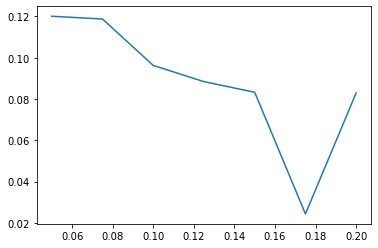

In [129]:
plt.plot(test_results.alpha.unique(), grouped_runs.mean().dist_x_true)

In [13]:
alphas

array([0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ])

In [4]:
final_values_arr = {}
iterations = {}
dist_x_trues = {}
dist_fx_trues = {}
reps = 10
for s in sparsities:
    iters_temp = 0
    errs_fx_temp = 0
    errs_x_temp = 0
    for i in range(reps):
        _, final_values, _ = Benchmark1.single_test(solver_ospca.solve, n, ranks, s, num_samples, theta = thetas)
        final_values_arr[str(s)] = final_values
        iters_temp += final_values['iteration']
        errs_fx_temp += final_values['dist_fx_true']
        errs_x_temp += final_values['dist_x_true']
    iterations[str(s)] = iters_temp/reps
    dist_x_trues[str(s)] = errs_x_temp/reps
    dist_fx_trues[str(s)] = errs_fx_temp/reps
    print("Mean iters: %5d \t x_dist: %0.8e \t fx_dist: %0.8e" % (round(iterations[str(s)]), dist_x_trues[str(s)], dist_fx_trues[str(s)]))


Problem solved in 136 iterations.


/Users/vary/src/pynopt/nopt/constraints/sparse_oblique.py:56: RuntimeWarning: invalid value encountered in true_divide
  return (ind, _x / col_norms)


Problem solved in 367 iterations.
Problem solved in 142 iterations.
Problem solved in 98 iterations.
Problem solved in 154 iterations.
Problem solved in 88 iterations.
Problem solved in 959 iterations.
Problem solved in 98 iterations.
Problem solved in 202 iterations.
Problem solved in 82 iterations.
Mean iters:   233 	 x_dist: 1.19781419e-01 	 fx_dist: 3.44143790e-03
Problem solved in 202 iterations.
Problem solved in 166 iterations.
Problem solved in 269 iterations.
Problem solved in 119 iterations.
Problem solved in 174 iterations.
Problem solved in 1292 iterations.
Problem solved in 96 iterations.
Problem solved in 195 iterations.
Problem solved in 103 iterations.
Problem solved in 640 iterations.
Mean iters:   326 	 x_dist: 1.10611964e-01 	 fx_dist: 9.86423232e-04
Problem solved in 151 iterations.
Problem solved in 209 iterations.
Problem solved in 129 iterations.
Problem solved in 297 iterations.
Problem solved in 260 iterations.
Problem solved in 316 iterations.
Problem solved i

/var/folders/7m/q_q2llts4f10jsygyggbp9kw0000gp/T/ipykernel_43669/4224488823.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(list(iterations.keys()))
/var/folders/7m/q_q2llts4f10jsygyggbp9kw0000gp/T/ipykernel_43669/4224488823.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(list(iterations.keys()))
/var/folders/7m/q_q2llts4f10jsygyggbp9kw0000gp/T/ipykernel_43669/4224488823.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_xticklabels(list(iterations.keys()))


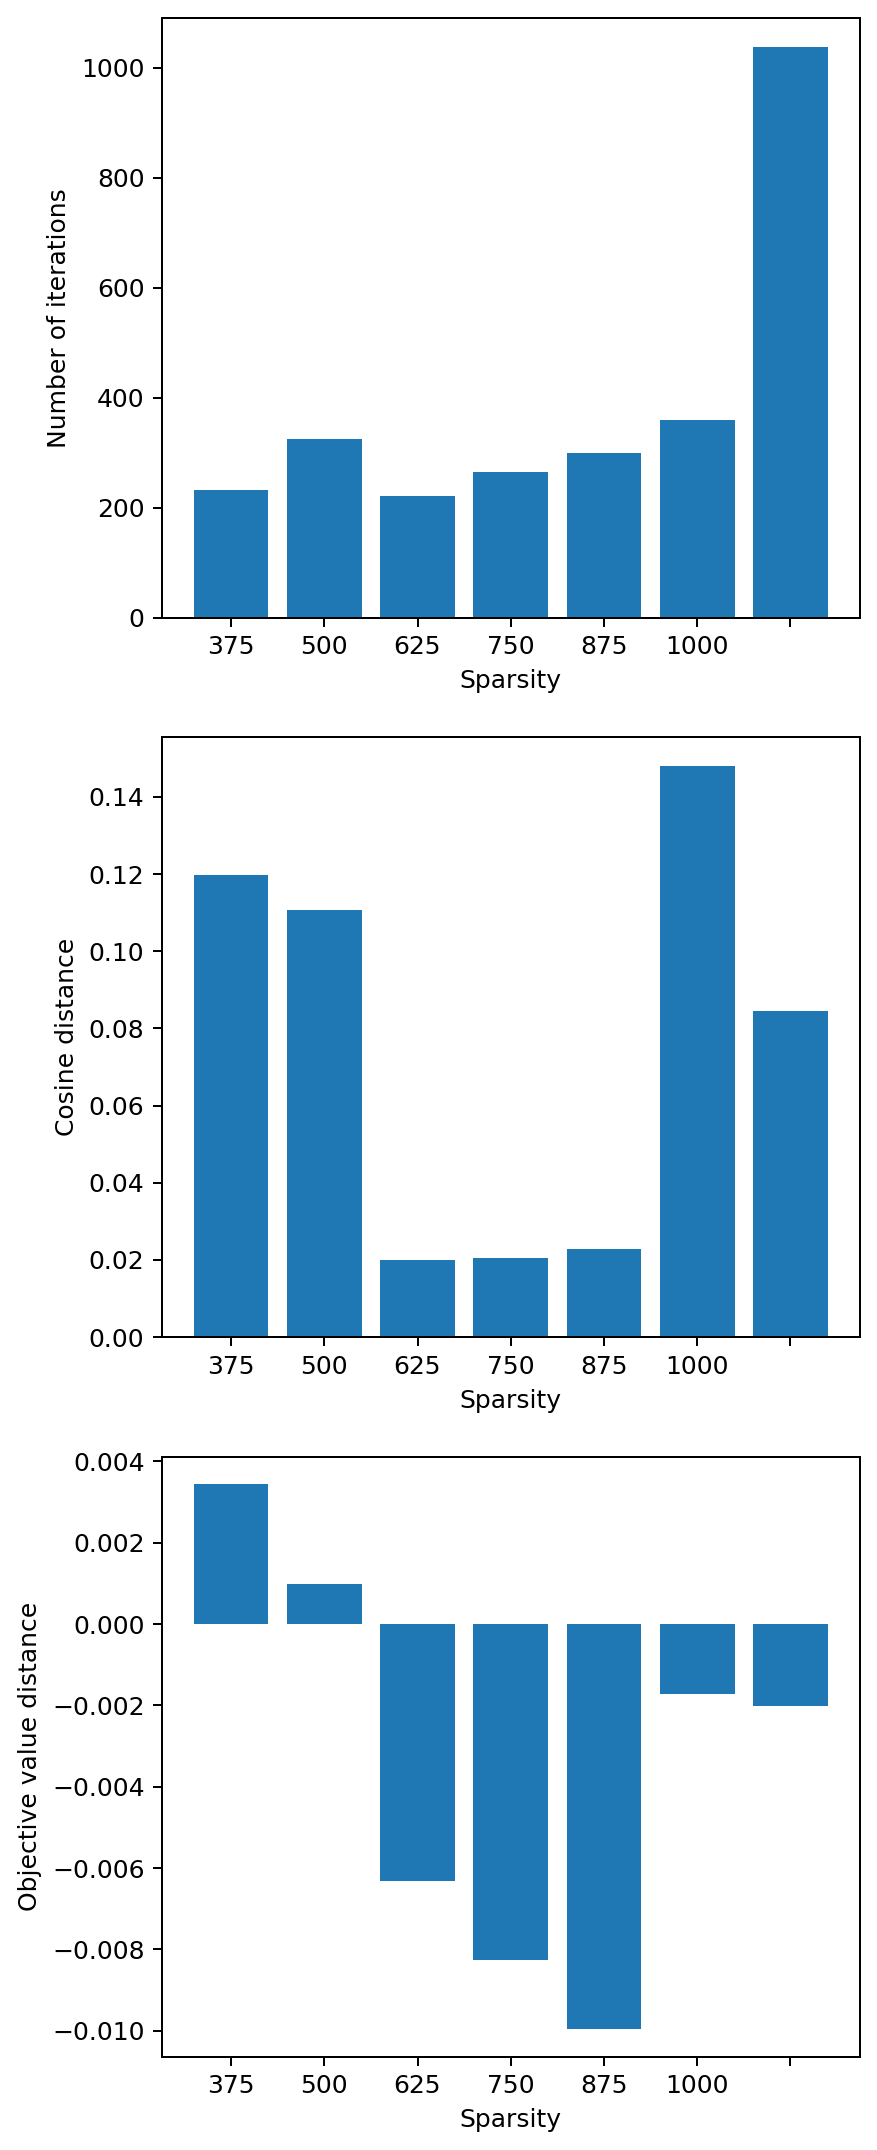

In [5]:
fig, axs = plt.subplots(3,1)
fig.set_size_inches(5, 15)
fig.set_dpi(180)
im1=axs[0].bar(range(len(iterations)), list(iterations.values()), align='center')
axs[0].set_xticklabels(list(iterations.keys()))
axs[0].set_ylabel('Number of iterations')
axs[0].set_xlabel('Sparsity')
im2=axs[1].bar(range(len(iterations)), list(dist_x_trues.values()), align='center')
axs[1].set_xticklabels(list(iterations.keys()))
axs[1].set_ylabel('Cosine distance')
axs[1].set_xlabel('Sparsity')
im3=axs[2].bar(range(len(iterations)), list(dist_fx_trues.values()), align='center')
axs[2].set_ylabel('Objective value distance')
axs[2].set_xticklabels(list(iterations.keys()))
axs[2].set_xlabel('Sparsity')
plt.show()


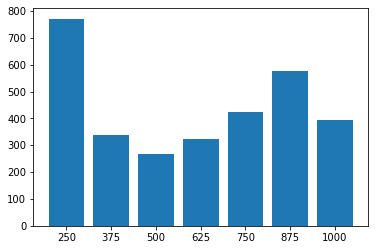

In [22]:
plt.bar(range(len(iterations)), list(iterations.values()), align='center')
plt.xticks(range(len(iterations)), list(iterations.keys()))
plt.show()

In [19]:
np.random.seed(seed)
final_values = {}
for params in params_list:
    n = params[0]
    rank = params[1]
    sparsity = params[2]
    num_samples = params[3]
    theta = params[4]
            
    _, track_values, _ = self.single_test(self, solver, n, rank, sparsity, num_samples, theta)
    final_values[params] = track_values

250

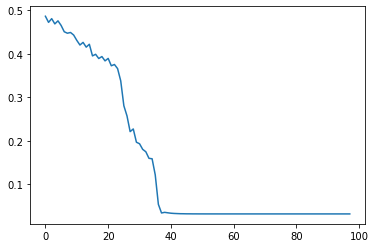

In [18]:
plt.plot(opt_log['iterations']['dist_x_true'])

In [7]:
track_values

{'fx': 506.2931668512404,
 'iteration': 310,
 'time': 2.61405086517334,
 'dist_fx_true': -0.005737434396284683,
 'dist_x_true': 0.04911063383958569}

In [10]:
np.random.seed(123)
struct_s = np.repeat(round(s/r), r)
subspace0, q0 = GenerateQSMat1((n,r), struct_s)

sparsities = np.count_nonzero(q0, 0)
# Signal strength
theta = np.linspace(5, 2, num = r) # np.zeros((r,)) #
theta = np.diag(theta)
samples = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + 5*q0 @ q0.T, N).T
#covariance matrix = samples @ samples.T / N
A = LinearMatrix(samples.T / np.sqrt(N))
A = LinearMatrix(samples @ samples.T / N)

1.549142831326303
0.016153062443775415


In [11]:
lam = n
print(lam)
problem = SparsePrincipalSubspace(A, rank = r, sparsity=s)
problem.objective(q0)

500


504.50670869600975

In [12]:
solver_lf = LandingField(logverbosity = 2, maxiter = 10000)
solver_ospca = ObliqueSPCA(logverbosity = 2, maxiter = 10000)

In [13]:
subspace, x, opt_log = solver_ospca.solve(problem)

 iter		   obj. value	    grad. norm
    1	+5.2905906291049121e+02	1.23701250e+02
    2	+5.2813193062302537e+02	8.06440578e+01
    3	+5.2772474480302401e+02	7.10355191e+01
    4	+5.2746215741433934e+02	7.16608391e+01
    5	+5.2726553359772299e+02	6.91954302e+01
    6	+5.2711662399630825e+02	7.05199846e+01
    7	+5.2700293171049077e+02	7.02640883e+01
    8	+5.2692420234682231e+02	7.12282798e+01
    9	+5.2687142381043930e+02	7.19605936e+01
   10	+5.2684942470903718e+02	7.26874459e+01
   11	+5.2684734566654265e+02	7.40434792e+01
   12	+5.2577668761177824e+02	7.45999864e+01
   13	+5.2556662956860475e+02	5.74365045e+01
   14	+5.2509727147189381e+02	6.54140701e+01
   15	+5.2489994021722021e+02	5.59469923e+01
   16	+5.2487468188799255e+02	6.23548208e+01
   17	+5.2443844409230542e+02	6.49539177e+01
   18	+5.2432484925572942e+02	5.61365091e+01
   19	+5.2228909422177082e+02	8.54416897e+01
   20	+5.2199448183523873e+02	5.68762612e+01
   21	+5.2191921531068419e+02	6.06994382e+01
   22	+5.2156619990

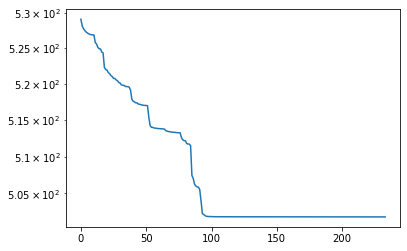

In [14]:
plt.semilogy(opt_log['iterations']['fx'])

In [16]:
alpha_scikit = 0.48
transformer = SparsePCA(n_components=r, random_state=0, alpha = alpha_scikit)
transformer.fit(A._matrix)
x_scikit = transformer.components_.T
print('alpha: ', alpha_scikit, '| sparsity ratio:', np.count_nonzero(x_scikit)/s)

alpha:  0.48 | sparsity ratio: 0.964


scikit:       0.7935426701024764
oblique:      0.7964221060421266
groundtruth:  0.7952664659445978
max non-orthogonality of x: 0.018894335732488984


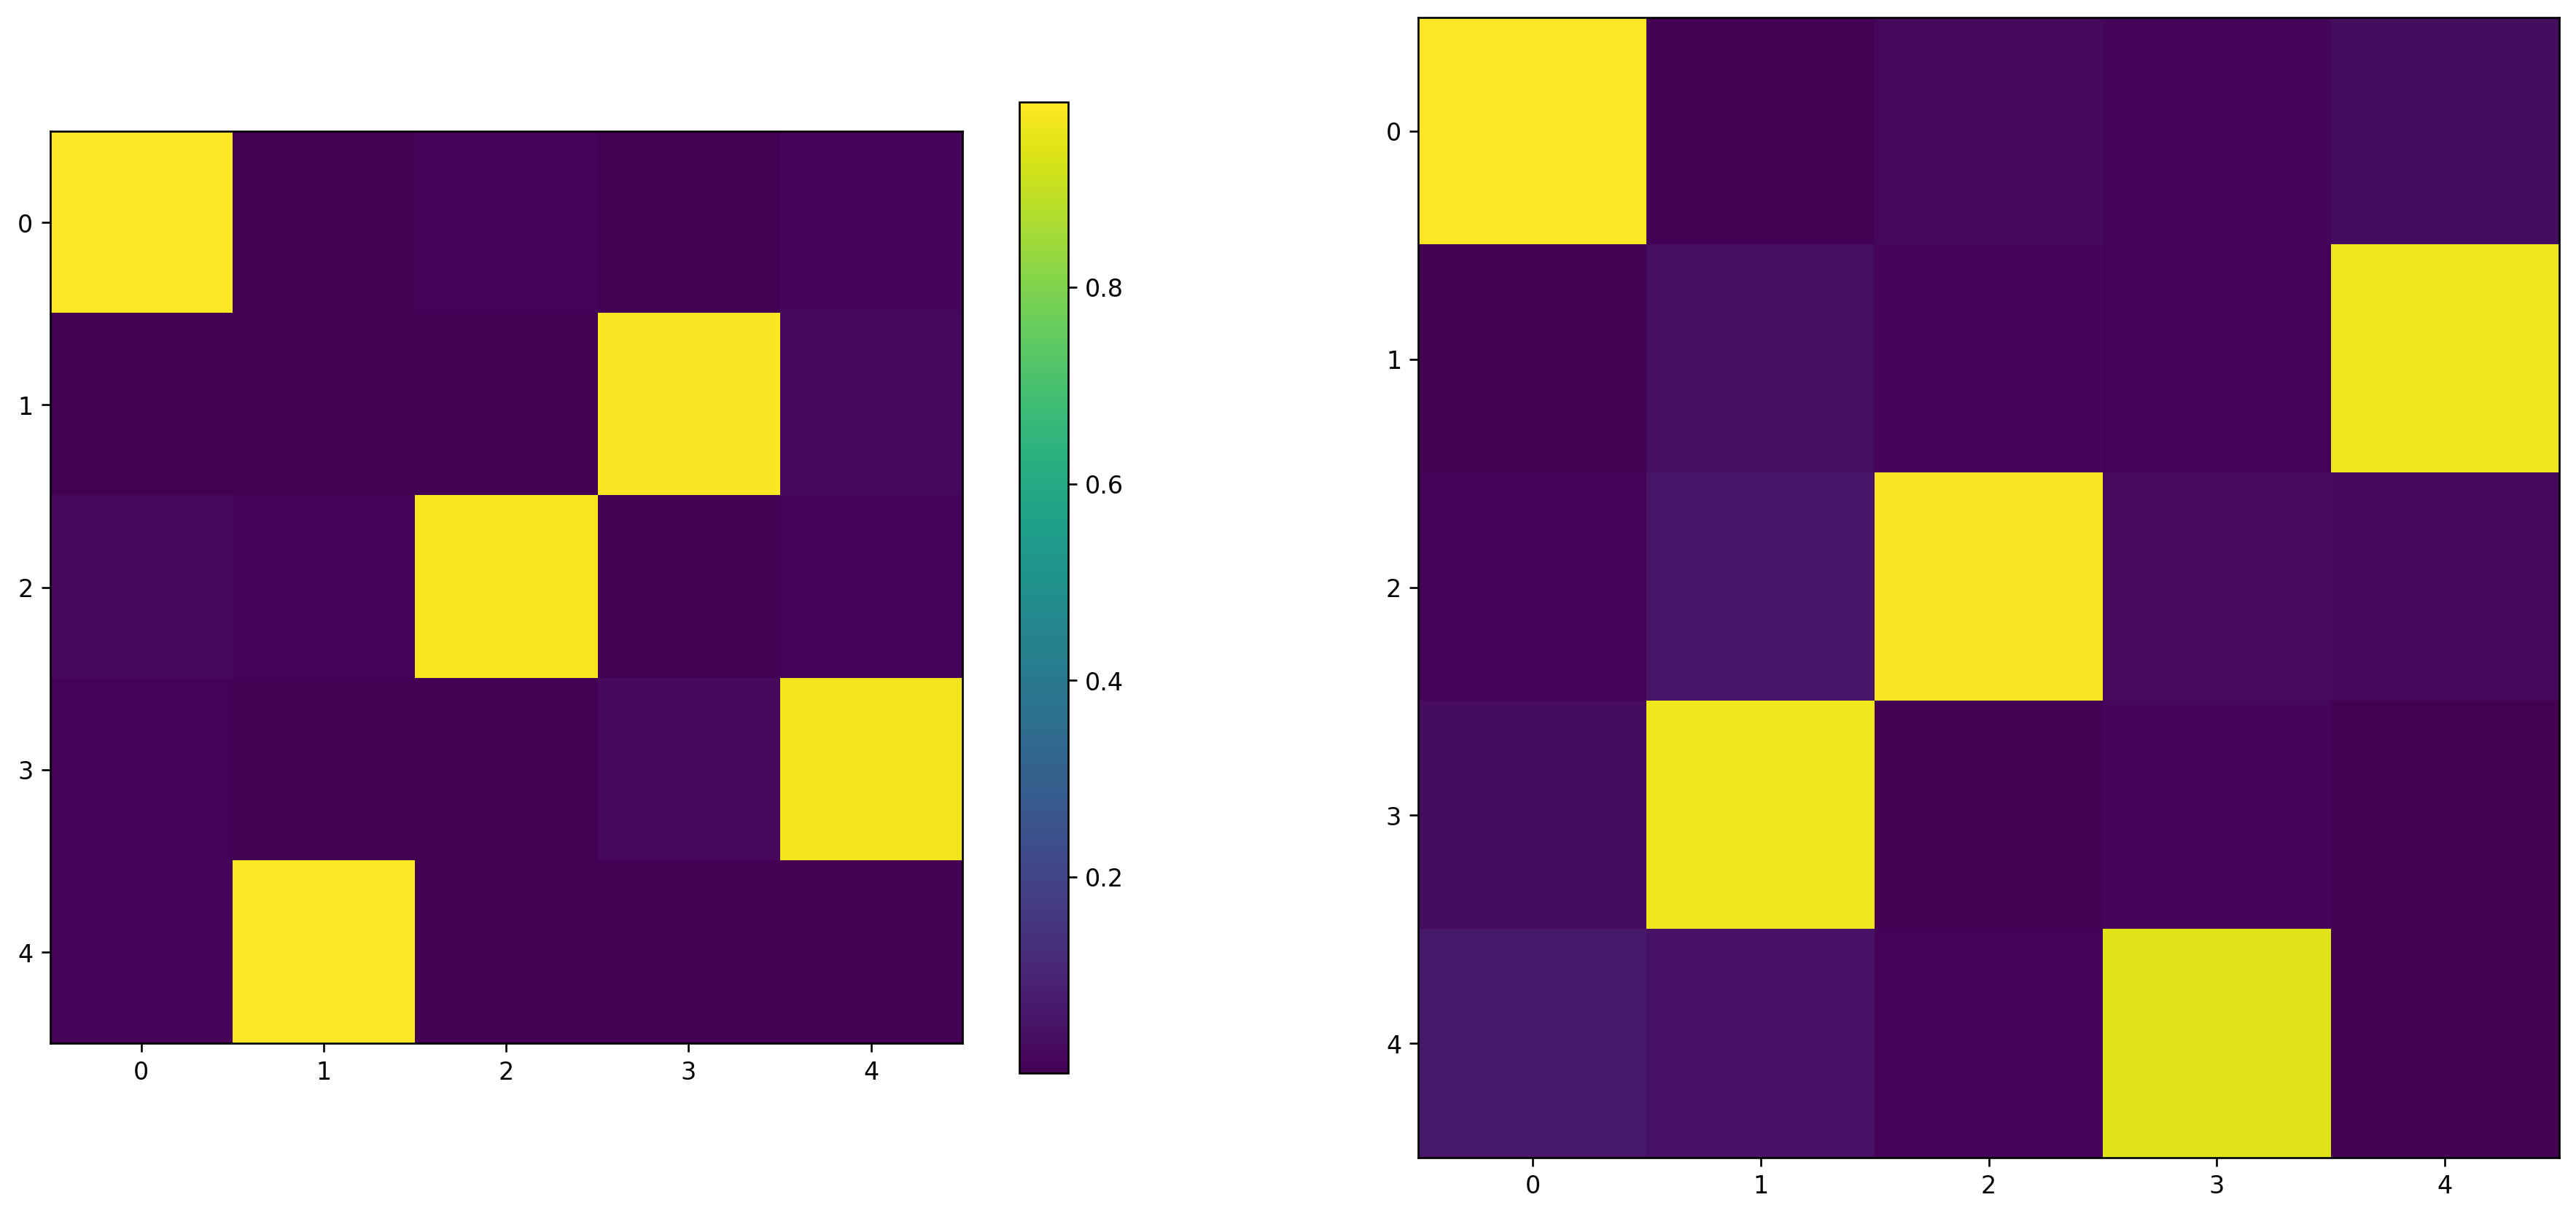

In [17]:
#print('naive:       ', 1 - problem.objective(x0) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('scikit:      ', 1 - problem.objective(x_scikit) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('oblique:     ', 1 - problem.objective(x) / (2*np.linalg.norm(A._matrix,'fro')**2))
print('groundtruth: ', 1 - problem.objective(q0) / (2*np.linalg.norm(A._matrix,'fro')**2))
if r == 1:
    print(np.linalg.norm( (q0.T @ x) * x - q0))
else:
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(18.5, 10.5)
    fig.set_dpi(240)
    im1=axs[0].imshow(np.abs(q0.T @ x))
    im2=axs[1].imshow(np.abs(x_scikit.T @ q0))
    fig.colorbar(im1, ax = axs[0], shrink=.7)
    print('max non-orthogonality of x:', np.max(np.abs(np.eye(r,r) - x.T @ x)))

In [19]:
np.ones(r)
HTs = Sparsity(np.ones(r, dtype = int))
_, largest_values = HTs.project(q0.T @ x)
q0 @ np.sign(largest_values) - x

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.0133347 ,  0.        ,  0.        ,  0.00174358,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       ...,
       [ 0.00644519,  0.03707615,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.02041284],
       [ 0.        ,  0.01544842,  0.03514124,  0.        ,  0.        ]])

In [22]:
np.linalg.norm(q0 @ np.sign(largest_values) - x) / np.linalg.norm(q0)

0.19370468851935285

In [36]:
np.max(np.abs(q0.T @ x) - np.eye(r))

0.9861090565222392

In [25]:
np.linalg.norm(q0, axis = 0)

array([1.        , 0.99999686, 0.99986519, 0.99999268, 0.99987106])

In [31]:
np.linalg.norm(q0 @ np.sign(largest_values) - x, axis = 0)

array([0.15281085, 0.16590367, 0.21436102, 0.18075239, 0.24101805])

In [59]:
t1

(array([0, 1, 2, 3, 4]), array([0, 3, 2, 4, 1]))

In [62]:
np.sign(t2).shape

(5, 5)

In [19]:
HTs = Sparsity(np.ones((r,1)))
np.abs(q0.T @ x)


array([[9.88324423e-01, 5.65368460e-03, 1.07010219e-02, 3.54382139e-03,
        1.86190134e-02],
       [2.77350479e-03, 6.63993683e-03, 3.75857652e-03, 9.83661143e-01,
        2.29274750e-02],
       [2.25830643e-02, 8.90392865e-03, 9.76889879e-01, 2.50919409e-03,
        9.75528809e-03],
       [9.22166392e-03, 3.15423126e-03, 1.32586864e-03, 2.07599576e-02,
        9.70947826e-01],
       [1.17797151e-02, 9.86109057e-01, 2.97665752e-03, 9.70303438e-04,
        1.72316594e-03]])

In [ ]:
s/r

10.0